In [11]:
%load_ext autoreload
%autoreload 2

import logging

import pandas as pd

import helpers.hdbg as hdbg
import helpers.hpandas as hpandas
import helpers.hprint as hprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
hprint.config_notebook()

# hdbg.init_logger(verbosity=logging.DEBUG)
hdbg.init_logger(verbosity=logging.INFO)
# hdbg.test_logger()
_LOG = logging.getLogger(__name__)

# Load data

## Use ImClient

In [ ]:
# TODO(max): Add ImClient (ok to use CCXT)

## Read from file

In [9]:
# TODO(max): read cryptochassis
df = pd.read_csv("/app/vendors_lime/taq_bars/notebooks/data.csv", index_col=0)
df.head()

,egid,ric,start_time,end_time,volume,close,ask,bid,sided_ask_count,sided_bid_count
0,1455235,WINM21,1622496660,1622496720,10374,126140.0,126150.0,126140.0,0,1347
1,1455235,WINM21,1622496720,1622496780,0,NaN,126150.0,126140.0,0,0
2,1455235,WINM21,1622496780,1622496840,0,NaN,126150.0,126140.0,0,0
3,1455235,WINM21,1622496840,1622496900,0,NaN,126150.0,126140.0,0,0
4,1455235,WINM21,1622496900,1622496960,0,NaN,126150.0,126140.0,0,0


In [12]:
hpandas.df_to_str(df, print_shape_info=True)

index=[0, 230079]
columns=egid,ric,start_time,end_time,volume,close,ask,bid,sided_ask_count,sided_bid_count
shape=(230080, 10)


,egid,ric,start_time,end_time,volume,close,ask,bid,sided_ask_count,sided_bid_count
0,1455235,WINM21,1622496660,1622496720,10374,126140.0,126150.0,126140.0,0,1347
1,1455235,WINM21,1622496720,1622496780,0,NaN,126150.0,126140.0,0,0
2,1455235,WINM21,1622496780,1622496840,0,NaN,126150.0,126140.0,0,0
,...,...,...,...,...,...,...,...,...,...
230077,1487340,CFGU1,1623360360,1623360420,0,NaN,2684.0,2683.0,0,0
230078,1487340,CFGU1,1623360420,1623360480,0,NaN,2684.0,2683.0,0,0
230079,1487340,CFGU1,1623360480,1623360540,0,NaN,2684.0,2683.0,0,0


# Analyze

In [1]:
# The format is like:

#     asset_id name    start_time    end_time    volume    close    ask    bid    sided_ask_count    sided_bid_count
# 0    1455235    WINM21    1622496660    1622496720    10374    126140.0    126150.0    126140.0    0    1347
# 1    1455235    WINM21    1622496720    1622496780    0    NaN    126150.0    126140.0    0    0

In [1]:
import vendors_lime.taq_bars.futures_utils as tu

import core.finance.tradability as cfintrad

# TODO(max): Use the right functions (calculate_twap)

df2 = tu.normalize_data(df)
hpandas.df_to_str(df2, print_shape_info=True)

ModuleNotFoundError: No module named 'vendors_lime'

In [15]:
df2.groupby("ric")["volume"].sum()

ric
BRRTSN1      7046740
CFGU1        2446239
CMAU1        3600999
CTAU1        4099460
DBYU1        3257676
DCPU1        3148745
DIJN21       1860025
DSMU1        3832183
ESM1         7122526
NBNM1              0
NIFM1              0
NIRM1              0
SAGZ1        3153852
SFUU1        3923891
SHHCV1       2248598
SIRTSM1      6454806
SRBV1        7096038
TYU1         6262244
WDON21      18119533
WINM21     108936309
Name: volume, dtype: int64

In [18]:
futs = [
    "WINM21",
    "NIFM1",
    "NBNM1",
    "WDON21",
    "SRBV1",
    "SIRTSM1",
    "NIRM1",
    "BRRTSN1",
    "CTAU1",
    "CMAU1",
    "SHHCV1",
    "ESM1",
    "TYU1",
    "SFUU1",
    "DSMU1",
    "DIJN21",
    "DCPU1",
    "DBYU1",
    "SAGZ1",
    "CFGU1",
]

## Deep dive on one contract

WDON21
pct nans= 0.6299026425591099
pct_volume_0= 0.6299026425591099


<AxesSubplot:xlabel='start_time'>

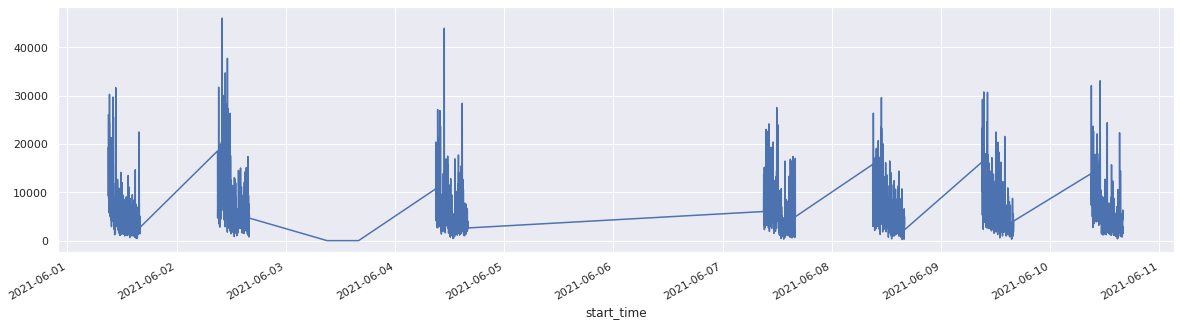

In [20]:
# fut = "WINM21"
# fut = "ESM1"
fut = futs[3]
print(fut)
df_tmp = tu.filter_by_ric(df2, fut)["volume"]

pct_nans = df["close"].isnull().mean()
print("pct nans=", pct_nans)

pct_volume_0 = (df["volume"] == 0).mean()
print("pct_volume_0=", pct_volume_0)

df_tmp = df_tmp.dropna()
# print(df_tmp)

df_tmp.plot()

In [ ]:
# Process data and print stats.

# fut = "WINM21"
# fut = "ESM1"
fut = futs[0]
print(fut)

df_tmp = tu.filter_by_ric(df2, fut)
# display(df_tmp.head(3))
hpandas.df_to_str(df_tmp, print_nan_info=True)
df_tmp = cfintrad.process_df(df_tmp, 5)

# print("trad.median=", df_tmp["trad"].median())
print(cfintrad.compute_stats(df_tmp))
df_tmp["trad"].hist(bins=101)

,close,ric,egid,volume,bid,ask,ret_0,spread_usd,spread_bps,trad,time
start_time,,,,,,,,,,,
2021-06-01 09:05:00-04:00,127565.0,WINM21,1455235,213070,127518.0,127523.0,0.000392,5.0,0.000039,10.003921,09:05:00
2021-06-01 09:10:00-04:00,127625.0,WINM21,1455235,203073,127608.0,127615.0,0.000470,7.0,0.000055,8.575460,09:10:00
2021-06-01 09:15:00-04:00,127845.0,WINM21,1455235,353982,127768.0,127773.0,0.001724,5.0,0.000039,44.075847,09:15:00


<AxesSubplot:xlabel='time'>

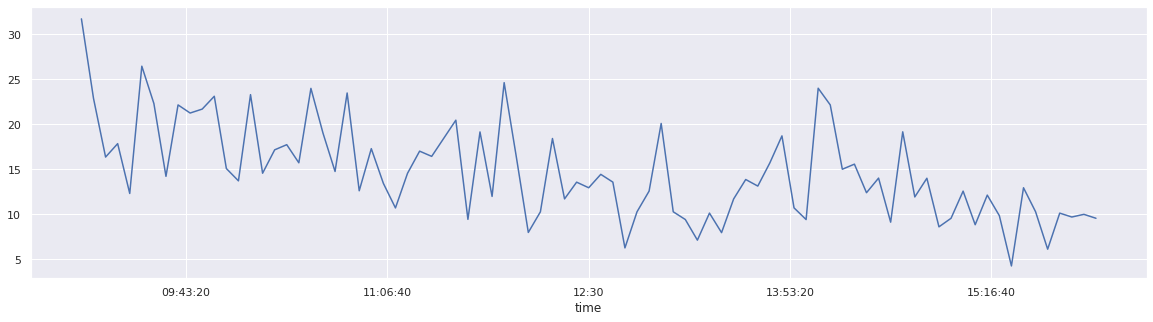

In [25]:
# Tradability over time.
df_tmp["time"] = df_tmp.index.time
display(df_tmp.head(3))
df_tmp.groupby("time")["trad"].mean().plot()

<AxesSubplot:xlabel='time'>

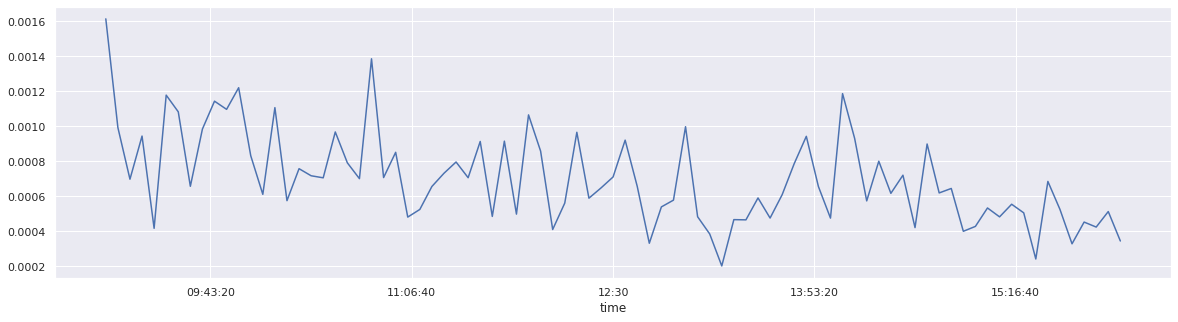

In [26]:
# Std dev over time.
df_tmp.groupby("time")["ret_0"].std().plot()

<AxesSubplot:xlabel='time'>

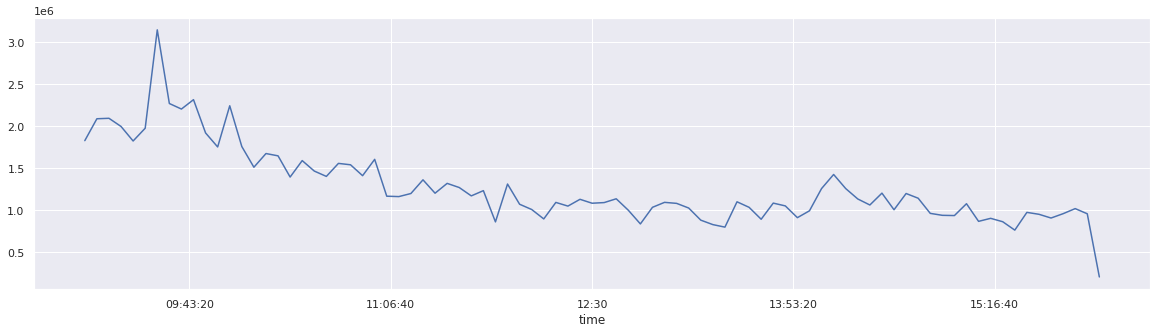

In [27]:
# Volume over time.

df_tmp.groupby("time")["volume"].sum().plot()
# df_tmp.groupby("time")["spread_bps"].std().plot()

In [28]:
df_tmp2 = df_tmp[["time", "ret_0"]]
# _ = df_tmp2.groupby("time").boxplot()#subplots=False)
# for time, df_0 in df_tmp2.groupby("time"):
#    print(df_0)

<AxesSubplot:>

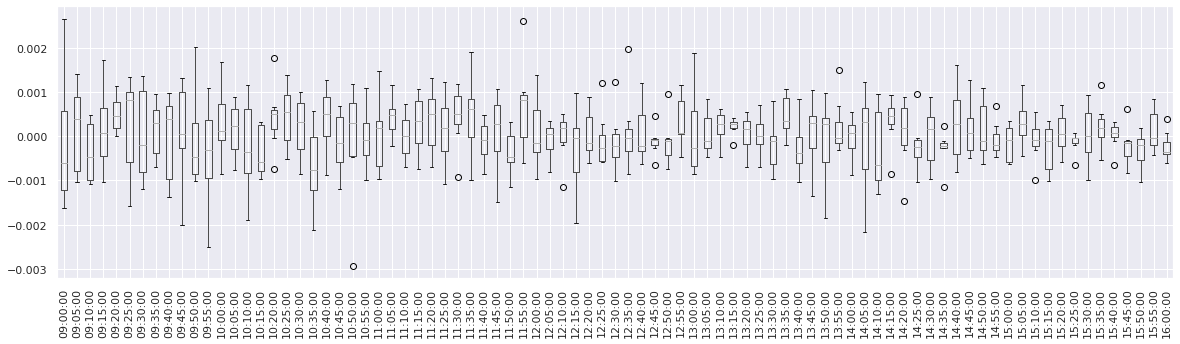

In [29]:
df_tmp2

df_tmp3 = []
for time, df_0 in df_tmp2.groupby("time"):
    # print(time, df_0["ret_0"])
    srs = pd.Series(df_0["ret_0"].values)
    srs.name = time
    df_tmp3.append(srs)
df_tmp3 = pd.concat(df_tmp3, axis=1)
df_tmp3.head()

df_tmp3.boxplot(rot=90)

In [31]:
df3 = df2.groupby("ric").apply(lambda df_tmp: cfintrad.process_df(df_tmp, 5))
df3.head(3)

close      ric     egid  volume     bid     ask     ret_0  spread_usd  spread_bps       trad
ric     start_time                                                                                                             
BRRTSN1 2021-06-01 09:05:00-04:00  71.22  BRRTSN1  1479454   19791  71.270  71.280 -0.001402       0.010    0.000140   9.985979
        2021-06-01 09:10:00-04:00  71.23  BRRTSN1  1479454   13155  71.180  71.190  0.000140       0.010    0.000140   1.000140
        2021-06-01 09:15:00-04:00  71.08  BRRTSN1  1479454   12564  71.122  71.136 -0.002106       0.014    0.000197  10.691723

In [32]:
# Compute stats for all futures.
gb = df3.reset_index(drop=True).groupby("ric").apply(cfintrad.compute_stats)

# gb.first()
gb.sort_values("trad")

,ric,close.mean,ret_0.mad,spread_usd.median,spread_bps.median,trad
ric,,,,,,
DIJN21,DIJN21,3.829623,0.000536,0.002800,0.000730,0.000000
TYU1,TYU1,132.192563,0.000127,0.015625,0.000118,0.999882
SAGZ1,SAGZ1,5731.553271,0.000732,1.000000,0.000176,2.000699
CTAU1,CTAU1,4723.387755,0.001325,2.000000,0.000427,2.001666
DSMU1,DSMU1,3597.524752,0.001206,1.000000,0.000279,2.747696
CMAU1,CMAU1,2488.076531,0.001574,1.000000,0.000407,2.749693
BRRTSN1,BRRTSN1,71.616411,0.000782,0.012000,0.000167,2.999997
ESM1,ESM1,4217.063328,0.000317,0.250000,0.000059,3.000535
SFUU1,SFUU1,2586.663317,0.001889,1.000000,0.000387,3.003474
